In [0]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets

In [0]:
# !pip install tensorboardX
#wrote logger.py
from logger import Logger

In [0]:
#practicing eith MNIST first...
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5, .5, .5), (.5, .5, .5))
        ])
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)
# Load data
data = mnist_data()
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)    

In [0]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()

In [0]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [0]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [0]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [0]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [0]:
#discriminator loss
loss = nn.BCELoss()

In [0]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [0]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [0]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [0]:
num_test_samples = 16
test_noise = noise(num_test_samples)

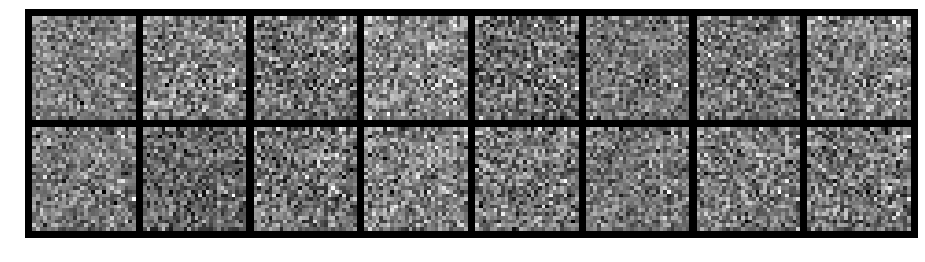

Epoch: [0/200], Batch Num: [0/600]
Discriminator Loss: 1.4011, Generator Loss: 0.6706
D(x): 0.5041, D(G(z)): 0.5112


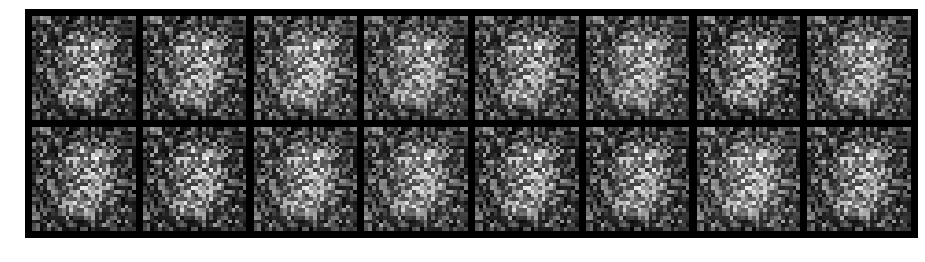

Epoch: [0/200], Batch Num: [100/600]
Discriminator Loss: 1.0220, Generator Loss: 1.8747
D(x): 0.6929, D(G(z)): 0.4189


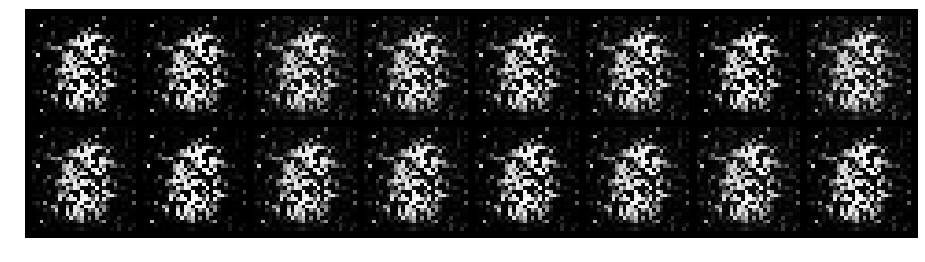

Epoch: [0/200], Batch Num: [200/600]
Discriminator Loss: 0.4538, Generator Loss: 3.0159
D(x): 0.8289, D(G(z)): 0.1981


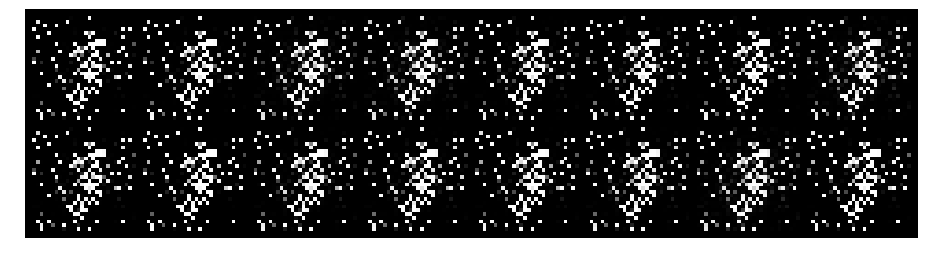

Epoch: [0/200], Batch Num: [300/600]
Discriminator Loss: 0.0557, Generator Loss: 5.3367
D(x): 0.9711, D(G(z)): 0.0197


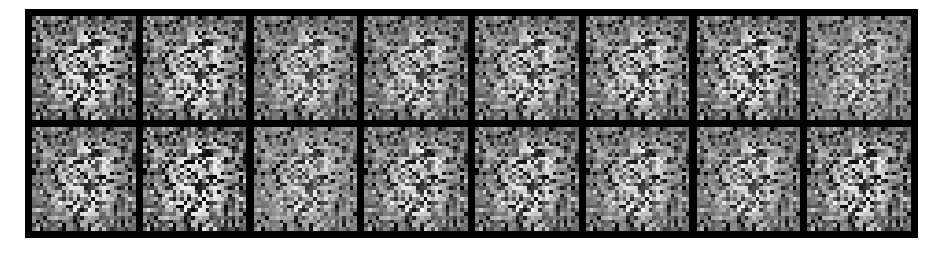

Epoch: [0/200], Batch Num: [400/600]
Discriminator Loss: 0.1601, Generator Loss: 3.4372
D(x): 0.9788, D(G(z)): 0.1217


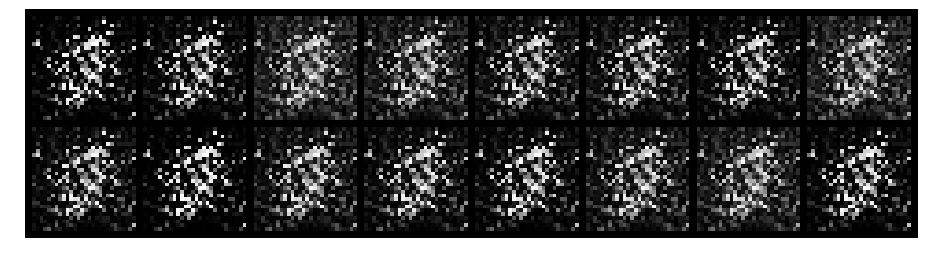

Epoch: [0/200], Batch Num: [500/600]
Discriminator Loss: 0.3210, Generator Loss: 4.4975
D(x): 0.9259, D(G(z)): 0.1720


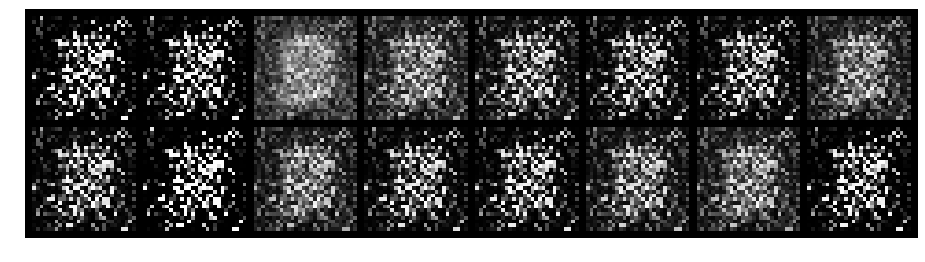

Epoch: [1/200], Batch Num: [0/600]
Discriminator Loss: 0.5672, Generator Loss: 6.0906
D(x): 0.8522, D(G(z)): 0.2088


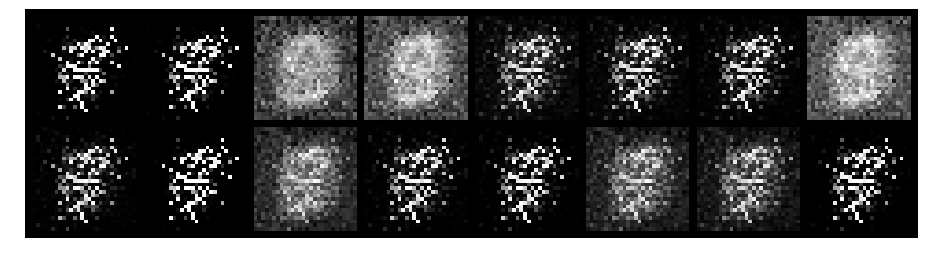

Epoch: [1/200], Batch Num: [100/600]
Discriminator Loss: 0.5306, Generator Loss: 6.0076
D(x): 0.8921, D(G(z)): 0.1902


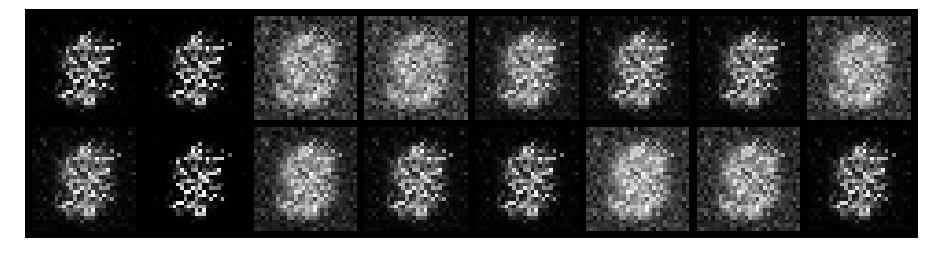

Epoch: [1/200], Batch Num: [200/600]
Discriminator Loss: 0.7998, Generator Loss: 2.5903
D(x): 0.7370, D(G(z)): 0.2967


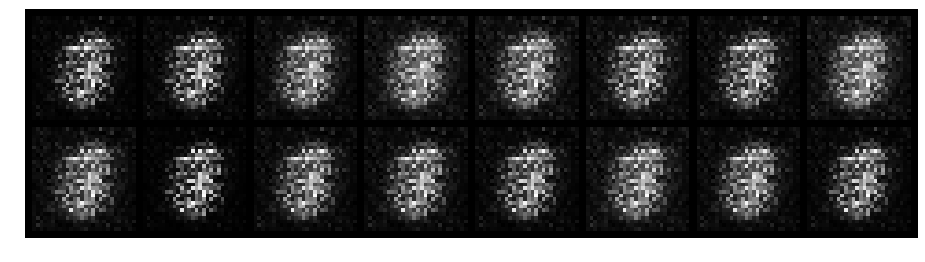

Epoch: [1/200], Batch Num: [300/600]
Discriminator Loss: 0.7006, Generator Loss: 2.1853
D(x): 0.8136, D(G(z)): 0.2933


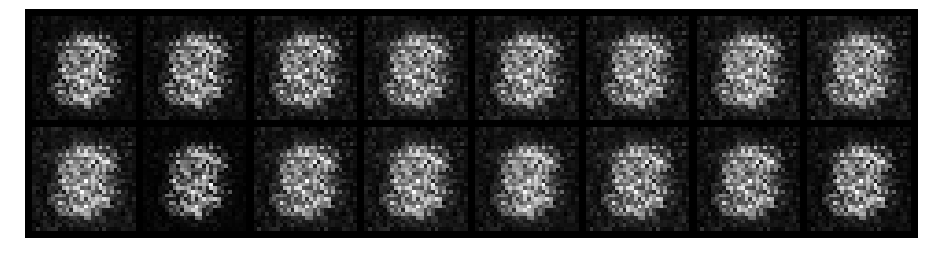

Epoch: [1/200], Batch Num: [400/600]
Discriminator Loss: 0.6137, Generator Loss: 2.3080
D(x): 0.7804, D(G(z)): 0.2519


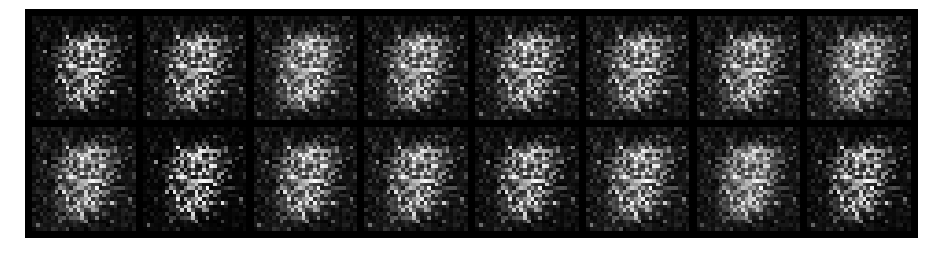

Epoch: [1/200], Batch Num: [500/600]
Discriminator Loss: 0.5496, Generator Loss: 4.2655
D(x): 0.8626, D(G(z)): 0.2127


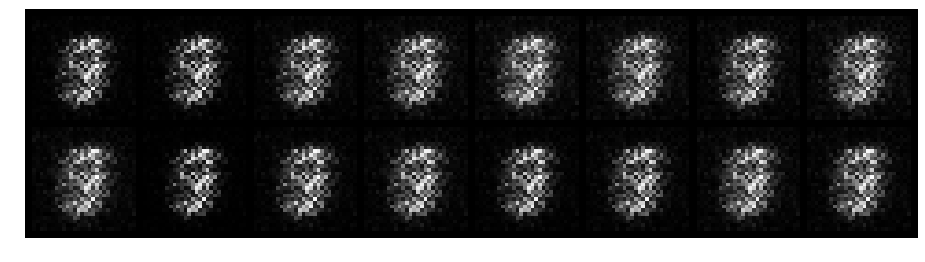

Epoch: [2/200], Batch Num: [0/600]
Discriminator Loss: 0.1747, Generator Loss: 4.1348
D(x): 0.9149, D(G(z)): 0.0588


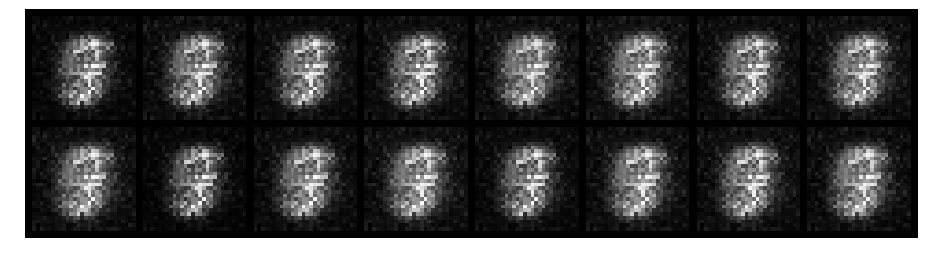

Epoch: [2/200], Batch Num: [100/600]
Discriminator Loss: 0.3946, Generator Loss: 3.6528
D(x): 0.8630, D(G(z)): 0.1588


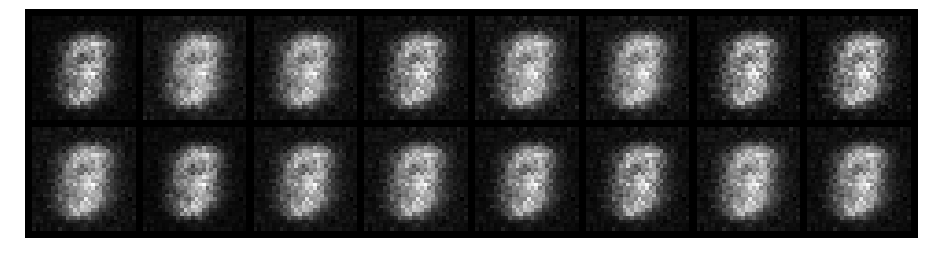

Epoch: [2/200], Batch Num: [200/600]
Discriminator Loss: 1.4784, Generator Loss: 1.3024
D(x): 0.5890, D(G(z)): 0.3530


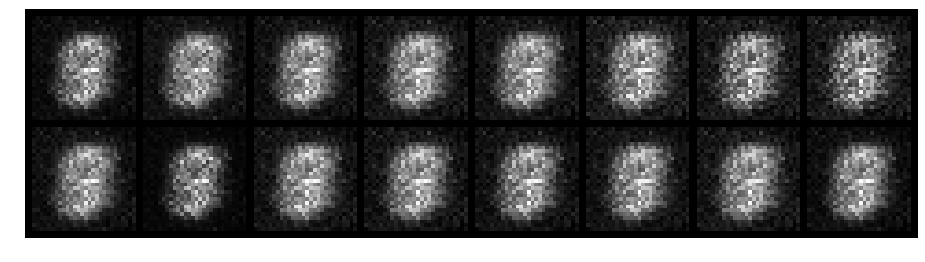

Epoch: [2/200], Batch Num: [300/600]
Discriminator Loss: 0.9175, Generator Loss: 1.2529
D(x): 0.6885, D(G(z)): 0.2931


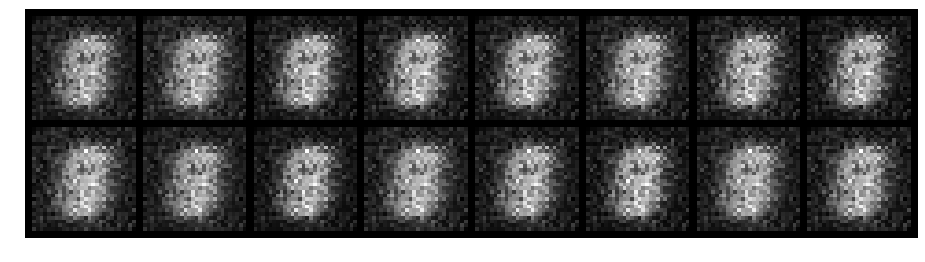

Epoch: [2/200], Batch Num: [400/600]
Discriminator Loss: 0.1552, Generator Loss: 3.7518
D(x): 0.9521, D(G(z)): 0.0883


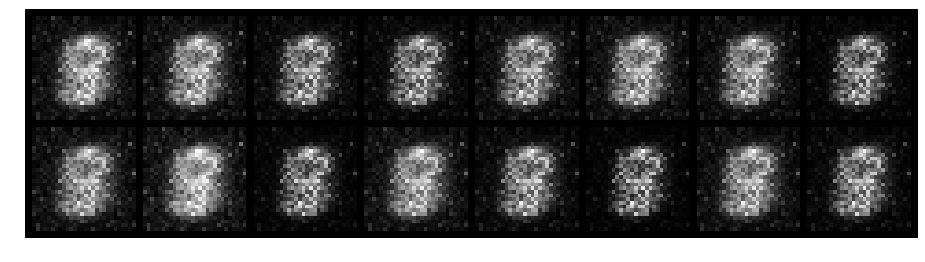

Epoch: [2/200], Batch Num: [500/600]
Discriminator Loss: 0.2519, Generator Loss: 3.8695
D(x): 0.9577, D(G(z)): 0.1529


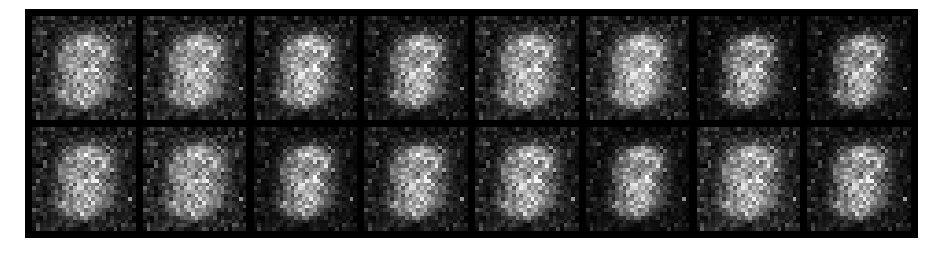

Epoch: [3/200], Batch Num: [0/600]
Discriminator Loss: 0.3032, Generator Loss: 4.0371
D(x): 0.9264, D(G(z)): 0.0698


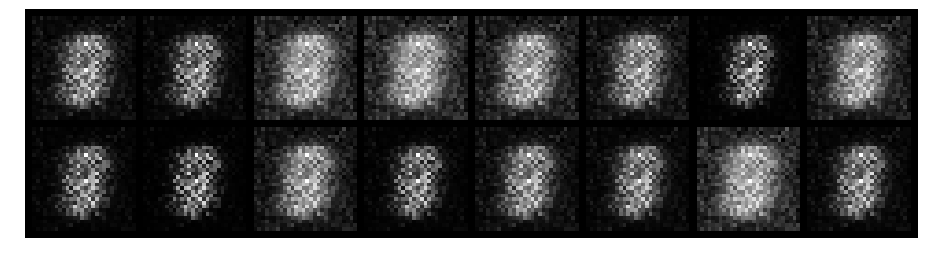

Epoch: [3/200], Batch Num: [100/600]
Discriminator Loss: 0.2789, Generator Loss: 4.5176
D(x): 0.9584, D(G(z)): 0.1486


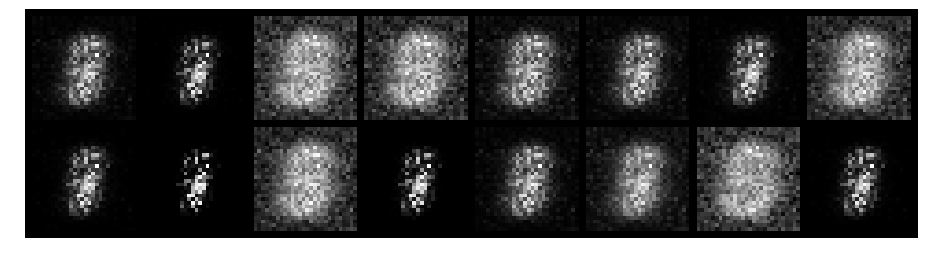

Epoch: [3/200], Batch Num: [200/600]
Discriminator Loss: 0.3185, Generator Loss: 3.6825
D(x): 0.8770, D(G(z)): 0.0633


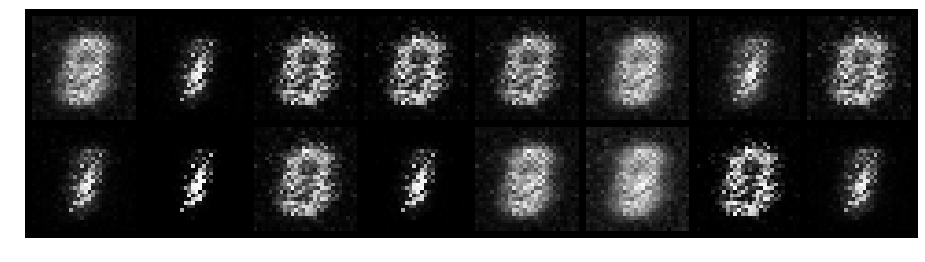

Epoch: [3/200], Batch Num: [300/600]
Discriminator Loss: 0.4956, Generator Loss: 3.7471
D(x): 0.8911, D(G(z)): 0.1941


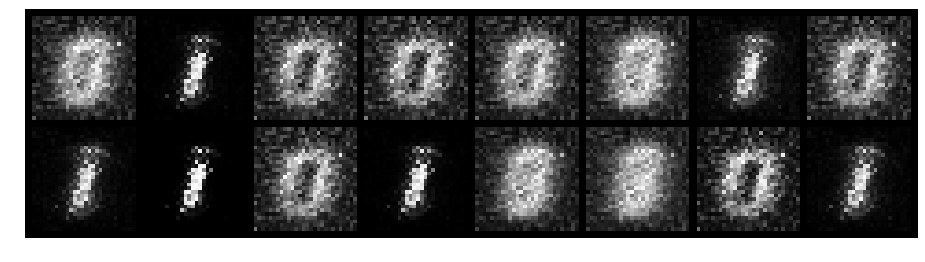

Epoch: [3/200], Batch Num: [400/600]
Discriminator Loss: 0.4660, Generator Loss: 3.3048
D(x): 0.9559, D(G(z)): 0.2304


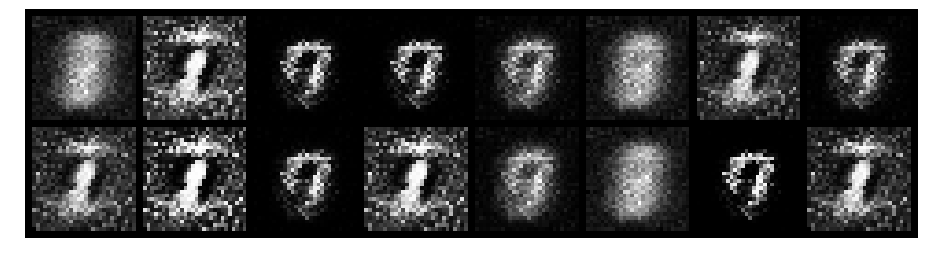

Epoch: [3/200], Batch Num: [500/600]
Discriminator Loss: 0.6292, Generator Loss: 3.9252
D(x): 0.8205, D(G(z)): 0.1364


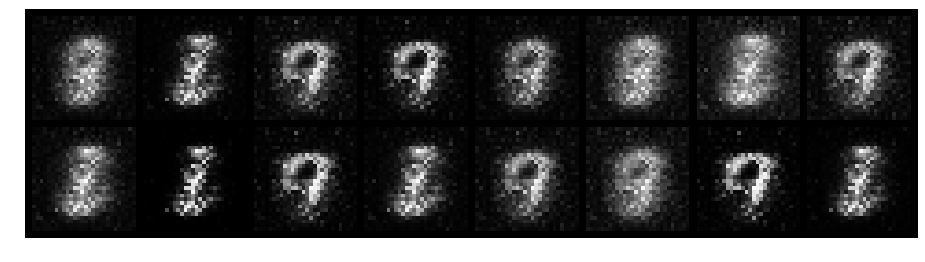

Epoch: [4/200], Batch Num: [0/600]
Discriminator Loss: 0.6408, Generator Loss: 2.0108
D(x): 0.7839, D(G(z)): 0.1853


In [0]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )